### Introduction

We have recently discussed the need to try and measure both production and efficency within the delivery team. The challenge is to try come up with a metric that we can use to determine if we are doing a better job of delivering work.

### Method

This document is a python notebook I have created so that we can do some statistical analysis on a dataset from the callsheet system and try to find a reasonable metric to quantify production and efficiency.

The challenge is that we are changing how we approach so many things, we are changing all obvious metrics at once. For example, if we had maintained our pricing methodology, it would be easy to define greater production merely by comparing the amount of money chargeable work has brought in. We could use the price to estimate work effort, more money would suggest a bigger job.

We cannot really just look at total time logged as of course this will just go up with the new staff hired, it does not necessarily mean that they produced more useful work in that time period. 

With that in mind I have extracted 2 base reports from informer which I have ran for 3 seperate years (2014, 2015 and 2016) one of which is a detailed dataset of all of the callsheets and the other is aggregated data.

### Callsheets

The simplest starting point is perhaps to just bring in some aggregated data for the 3 years in question and see some crude data for basic comparison. First lets import some libraries to help us work with this data.

In [18]:
# Standard Imports
import numpy as np
import pandas as pd

In [19]:
# Stats Imports
from scipy import stats

In [20]:
# Plotting
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
%matplotlib inline

Next lets read in our first 3 datasets, the 2014 2015 and 2015 aggreagated data (by month) from some csv files create in informer. This data focuses just on stratum callsheet work. It excludes project callsheets as the majority are for milestone or money tracking only. Analysis of project work will be done later.

In [22]:
cs_agg_2014_df = pd.read_csv('data/Callsheet Aggregates - 2014.csv')
cs_agg_2015_df = pd.read_csv('data/Callsheet Aggregates - 2015.csv')
cs_agg_2016_df = pd.read_csv('data/Callsheet Aggregates - 2016.csv')

Now lets see an example of the aggregated data for 2014 in tabular format.

In [23]:
cs_agg_2014_df

,Closed Month,Time Hours Total (Total),Time Hours Estimated (Total),Quote Time (Total),Count
0,1,498.48,1,152,204
1,2,578.73,0,160,179
2,3,303.19,0,55,157
3,4,243.26,0,95,139
4,5,368.58,0,135,172
5,6,437.10,0,155,138
6,7,1011.67,0,81,138
7,8,216.22,0,53,184
8,9,261.65,0,260,184
9,10,1086.54,0,161,175


#### Comparison of Callsheets Closed

We have similar data for 2015 and the first 2 months of 2016.  We can therefore simply compare the raw count of callsheets for each year by forming a simple bar chart of the information as follows.

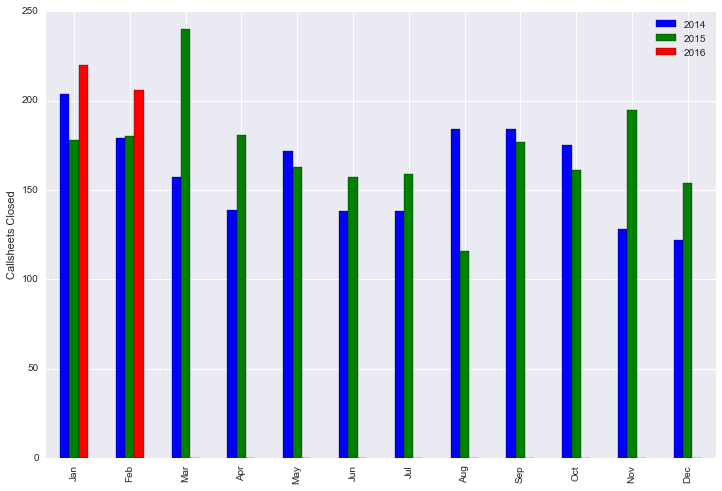

In [24]:
df14 = cs_agg_2014_df[['Count']]
df15 = cs_agg_2015_df[['Count']]
df16 = cs_agg_2016_df[['Count']]
df = pd.concat([df14, df15, df16], axis=1, join='outer')
df.columns = ['2014', '2015' , '2016']
ax = df.plot(kind='bar' , figsize=(12, 8))
ax.set_ylabel('Callsheets Closed')
ax.set_xticklabels(('Jan', 'Feb', 'Mar', 'Apr', 'May' , 'Jun' , 'Jul' , 'Aug' , 'Sep' , 'Oct' , 'Nov' , 'Dec'));


So just looking and pure number of callsheets we are, so far closing more calls tan at the same point in the previous 2 years. We are still straining our 3 new developers so I would expect this to improve steadily over the next 3 - 6 months.

This alone though is again, is not the full picture, how do we know these callsheets were a similar amount of work as previous years ?

#### Comparison of Callsheets Total Hours at Completion

What might be nice is to see that the estimates of work effort to complete these jobs has also gone up. eg. We have completed more callsheets than ever before and they were also of similar difficulty, therefore, more work done in total. Unfortunately the estimation data recorded ranges between sparse and none existent, particularly prior to 2016. So the next thing I looked at was total time spent on callsheets at the point of completion.

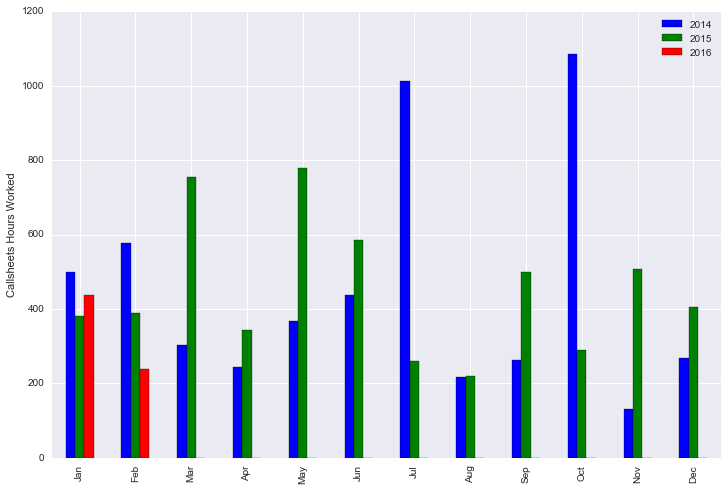

In [25]:
df14 = cs_agg_2014_df[['Time Hours Total (Total)']]
df15 = cs_agg_2015_df[['Time Hours Total (Total)']]
df16 = cs_agg_2016_df[['Time Hours Total (Total)']]
df = pd.concat([df14, df15, df16], axis=1, join='outer')
df.columns = ['2014', '2015' , '2016']
ax = df.plot(kind='bar' , figsize=(12, 8))
ax.set_ylabel('Callsheets Hours Worked')
ax.set_xticklabels(('Jan', 'Feb', 'Mar', 'Apr', 'May' , 'Jun' , 'Jul' , 'Aug' , 'Sep' , 'Oct' , 'Nov' , 'Dec'));

We can see that so far we are spending a similar amount of time on callsheets we have closed, (although february looks low the month is still not complete). This suggests that we are euther more efficient in closing the callsheets faster with less effort, or the callsheets were for smaller jobs, again accurate estimate recording here would help shed some light if we had it. As we have not another it is worth looking at quotable work.

#### Comparison of Quotable Work

How much are we closing that we have estimated and quoted a time for. We now that projects have dominated where we spend our effort, but has that caused a hit on qutable callsheet work ?

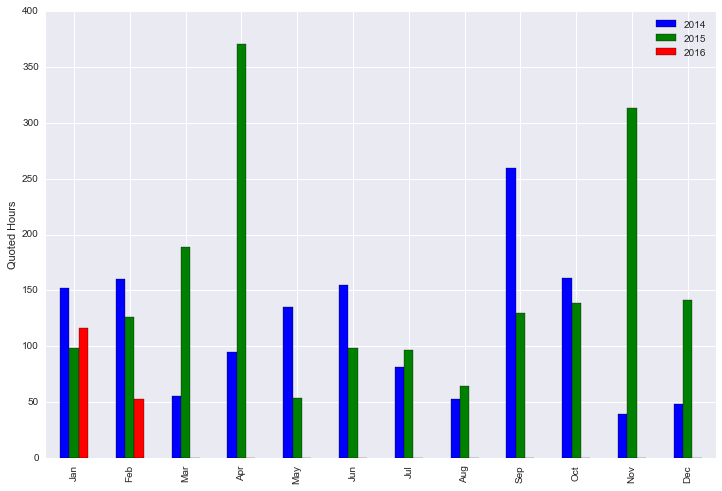

In [26]:
df14 = cs_agg_2014_df[['Quote Time (Total)']]
df15 = cs_agg_2015_df[['Quote Time (Total)']]
df16 = cs_agg_2016_df[['Quote Time (Total)']]
df = pd.concat([df14, df15, df16], axis=1, join='outer')
df.columns = ['2014', '2015' , '2016']
ax = df.plot(kind='bar' , figsize=(12, 8))
ax.set_ylabel('Quoted Hours')
ax.set_xticklabels(('Jan', 'Feb', 'Mar', 'Apr', 'May' , 'Jun' , 'Jul' , 'Aug' , 'Sep' , 'Oct' , 'Nov' , 'Dec'));

Whilst it is too early to say for 2016 it certainly appears there has been an overall drop off from 2014 in quoted, chargeable callsheet only work. This either suggests that, again, despite completing a higher amount of calls we are not completing as much work. But on inspection of the calls themslves it seems that we are increasingly chrgiang a fee (module price for example) rather than a quoted time, which is a good thing, but could account for the disparity so I think quotable time should be avoided as a metric.

#### Callsheet Duration

We have, so far, seen some evidence that we are dealing with a higher volume of work. And we have seen some suggestion we may be doing this while being more efficient. One of the criticisms we have had surrounding efficiency is the length of time some callsheets have taken. A logical thing for us to look at would be the duration of callsheets. Initially we will look at how long a call was 'with APT' as it is the area we can directly control, and is perhaps the best indicator of our capacity to fit work in and deal with it efficiently.In future however it may be worth looking at the total duration as this will give an insight on our ability to control a customer.

The data we will use for this, will be the detailed yearly data downloaded from informer. Below is a sample of the type of information it contains.

In [27]:
dtl_2014_df = pd.read_csv('data/Callsheet Detail - 2014.csv')
dtl_2015_df = pd.read_csv('data/Callsheet Detail - 2015.csv')
dtl_2016_df = pd.read_csv('data/Callsheet Detail - 2016.csv')
dtl_2016_df.head(10)

,Call No,Closed Date,Chargeable,Days With APT,Project Work,Quote Time,Time Hours Estimated,Time Hours Total
0,158465,21 Jan 2016,U,767,NaN,0,0,0.00
1,160492,25 Jan 2016,N,636,N,0,0,0.33
2,161192,4 Jan 2016,Y,587,Y,0,0,0.00
3,162852,22 Jan 2016,U,351,N,0,0,79.07
4,163136,4 Jan 2016,R,82,NaN,4,2,2.98
5,163770,1 Feb 2016,Y,266,N,29,0,51.10
6,164110,17 Feb 2016,N,348,N,0,5,11.39
7,164153,21 Jan 2016,N,382,N,0,0,0.25
8,164192,1 Feb 2016,N,382,N,0,0,2.25
9,164332,25 Jan 2016,N,368,NaN,0,0,0.00


We will look specifically at the 'Days with APT' column and we will use a histogram to map the data.This will give us a sense of the distribution of 

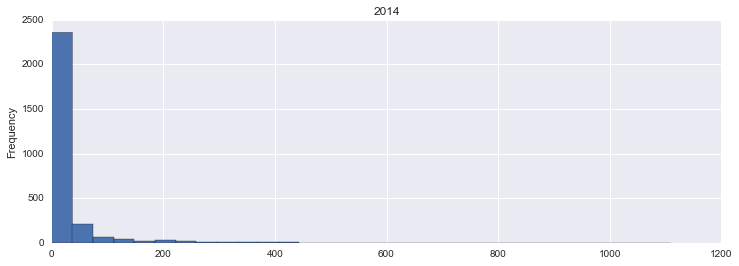

In [28]:
cs_dtl_2014_df = dtl_2014_df[dtl_2014_df['Project Work'] != 'Y']
cs_days_with_apt_2014 = cs_dtl_2014_df['Days With APT']
ax = cs_days_with_apt_2014.plot(kind='hist' , figsize=(12, 4), bins=30);
ax.set_title('2014');


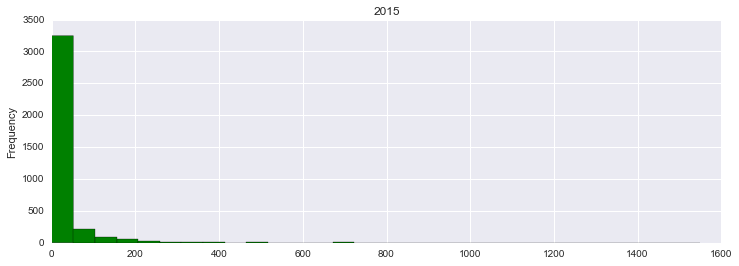

In [29]:
cs_dtl_2015_df = dtl_2015_df[dtl_2015_df['Project Work'] != 'Y']
cs_dtl_2015_df = cs_dtl_2015_df[cs_dtl_2015_df['Days With APT'] >= 0] # fix as there where some -1 values
cs_days_with_apt_2015 = cs_dtl_2015_df['Days With APT']
ax = cs_days_with_apt_2015.plot(kind='hist' , figsize=(12, 4), bins=30, color = 'green');
ax.set_title('2015');


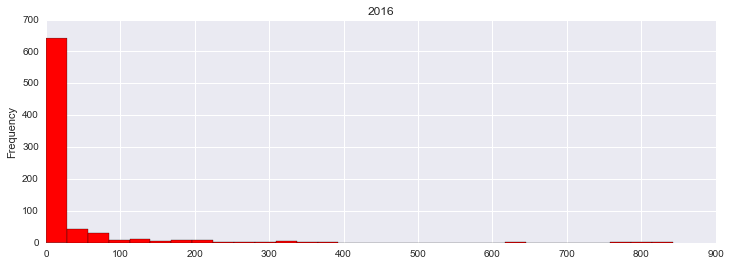

In [30]:
cs_dtl_2016_df = dtl_2016_df[dtl_2016_df['Project Work'] != 'Y']
# cs_dtl_2015_df = cs_dtl_2015_df[cs_dtl_2015_df['Days With APT'] >= 0] # fix as there where some -1 values
cs_days_with_apt_2016 = cs_dtl_2016_df['Days With APT']
ax = cs_days_with_apt_2016.plot(kind='hist' , figsize=(12, 4), bins=30, color = 'red');
ax.set_title('2016');

We can see that we are completing the vast number of callsheets in a shorth amount in every calendar year, with some horrible outliers that will need investigation. This only gives us a general sense though, we have differing numbers of datapoints and the scales of these histograms is different. The next step is to overlay them and see if we can see anything that will tell us anything about our performance. For clarity we will remove any extreme outliers and normalize the data to account for the differences in data points.

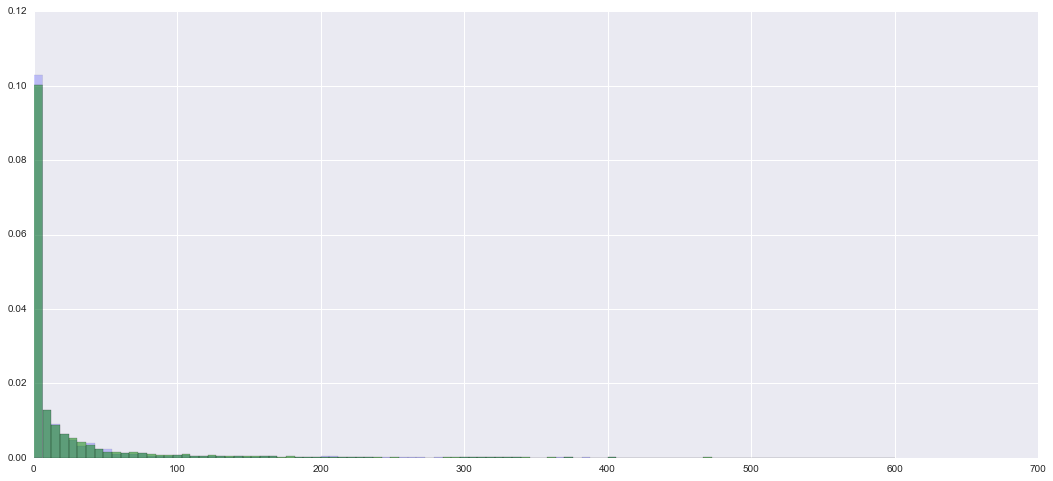

In [47]:
cs_dtl_2014_df = cs_dtl_2014_df[cs_dtl_2014_df['Days With APT'] < 600]
cs_days_with_apt_2014 = cs_dtl_2014_df['Days With APT']
cs_dtl_2015_df = cs_dtl_2015_df[cs_dtl_2015_df['Days With APT'] < 600]
cs_days_with_apt_2015 = cs_dtl_2015_df['Days With APT']
cs_dtl_2016_df = cs_dtl_2016_df[cs_dtl_2016_df['Days With APT'] < 600]
cs_days_with_apt_2016 = cs_dtl_2016_df['Days With APT']
plt.figure(figsize=(18, 8));
binBoundaries = np.linspace(0,600,100)
plt.hist(cs_days_with_apt_2014, color='blue' , normed = True , alpha = 0.2 ,bins = binBoundaries);
plt.hist(cs_days_with_apt_2015, color='green' , normed = True , alpha = 0.5 ,bins = binBoundaries);



The above data compares 2014 and 2015, it suggests that there was a greater density of callsheets completed after only being with APT a few days in 2014, and you can see more calls in 2015 creeping on for a very long amount of time. This suggests we were deterioating in the service we were providing.

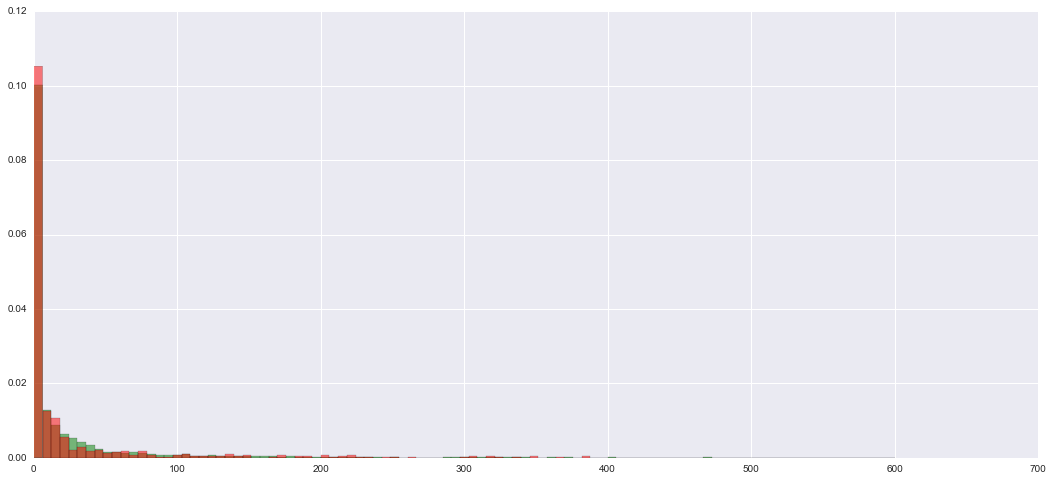

In [44]:
plt.figure(figsize=(18, 8));
plt.hist(cs_days_with_apt_2015, color='green' , normed = True , alpha = 0.5 ,bins = binBoundaries);
plt.hist(cs_days_with_apt_2016, color='red' , normed = True , alpha = 0.5 ,bins = binBoundaries);


However in the comparison between 2016 and 2015 it looks like we have corrcted this issue, we are tackling even more calls in those first few days. However there are still some high densities in the mid-term. This looks positive, however it is early in the year the sample size is small and all of this relates to *closed* calls. There could be a lot of open calls sat with us, that we close over the coming months that skew this. The data may suggest we are dealing with simple callsheets quickly but more complex callsheets are lingering longer than before.

### Projects

The project data is a little harder to analyse. But we can start again, as before, by just looking at the raw number of callsheets we have closed.

#### Comparison of Project Callsheets Closed

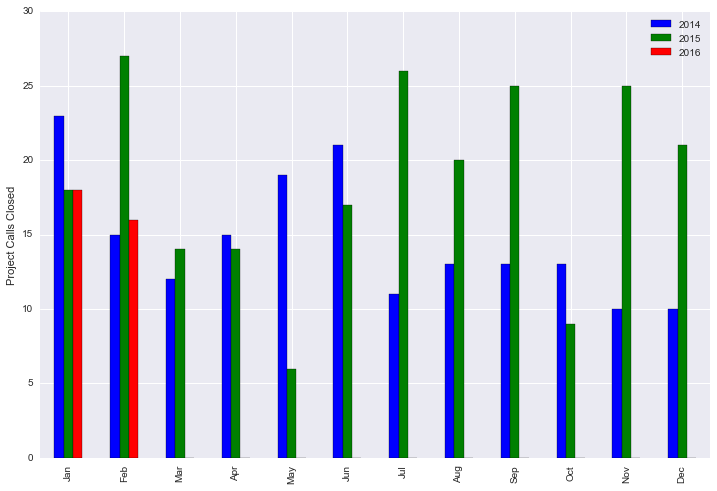

In [33]:
p_agg_2014_df = pd.read_csv('data/Project Aggregates - 2014.csv')
p_agg_2015_df = pd.read_csv('data/Project Aggregates - 2015.csv')
p_agg_2016_df = pd.read_csv('data/Project Aggregates - 2016.csv')
df14 = p_agg_2014_df[['Count']]
df15 = p_agg_2015_df[['Count']]
df16 = p_agg_2016_df[['Count']]
df = pd.concat([df14, df15, df16], axis=1, join='outer')
df.columns = ['2014', '2015' , '2016']
ax = df.plot(kind='bar' , figsize=(12, 8))
ax.set_ylabel('Project Calls Closed')
ax.set_xticklabels(('Jan', 'Feb', 'Mar', 'Apr', 'May' , 'Jun' , 'Jul' , 'Aug' , 'Sep' , 'Oct' , 'Nov' , 'Dec'));

As we can see the numbers fluctuate a lot and we are not closing as many calls of type "Project" as in previous years. However so much of what we do is now in jira, the way we use callsheets for projects has reduced the need for most callsheets around projects, the volume of the callsheets, outside of the master callsheet and certain milestone calls, is predominantly for training days or other charge tracking. The volume of these calls isnt descriptive of the amount of project work we are doing particularly in comparison to other years, so for projects, cannot really be used as a metric.

#### Comparison of Project Callsheets Total Hours at Completion

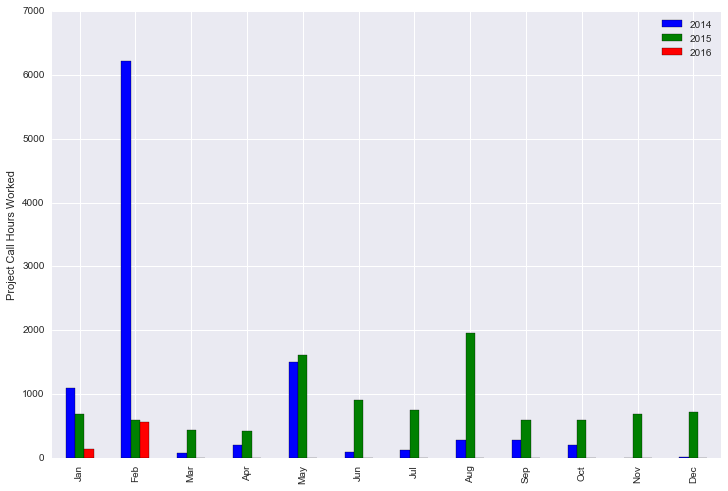

In [34]:
df14 = p_agg_2014_df[['Time Hours Total (Total)']]
df15 = p_agg_2015_df[['Time Hours Total (Total)']]
df16 = p_agg_2016_df[['Time Hours Total (Total)']]
df = pd.concat([df14, df15, df16], axis=1, join='outer')
df.columns = ['2014', '2015' , '2016']
ax = df.plot(kind='bar' , figsize=(12, 8))
ax.set_ylabel('Project Call Hours Worked')
ax.set_xticklabels(('Jan', 'Feb', 'Mar', 'Apr', 'May' , 'Jun' , 'Jul' , 'Aug' , 'Sep' , 'Oct' , 'Nov' , 'Dec'));

Time worked is possibly even worse, particularly looking month by month. The callsheets are open for such a long period of time it forces peaks at the point of closure. It would be far better to look at the amount of project hours logged in timesheets month on month.

Similarly, the vast majority of callsheets logged for projects are for charging purposes only and are closed immediately. But the master callsheet will be open for the duration of the project. The analysis of the length of time these calls are open overall will not tell us anything.

### Conclusion

In conclusion I think we have found a reasonable way of measuring how we are dealing with callsheets. We will use the 'Comparison of Callsheets Closed' to determine our production , we will ensure we are supplying a good customer service using the 'Callsheet Duration' histograms.

For projects I think we need to look at raw project hours completed, and also look to have callsheets for the milestones and for master callsheet that have both estimates and accurate time logged. We will need to be able to isolate these from all other callsheets project or otherwise. If we are confident in our estimates we can then use this data as the metric of "quantity" of project work completed, and by having it at milestone level we should get more datapoints than just looking at when master calls close.

Until this data is collected however the best we can probably do is simply use the time logged on project calls each month to determine the capacity we have to do project work (even though it could be spent inefficiently). 

By looking to see a consitent level of throughput is maintained on callsheets, and seeing that more time is logged against projects than previously, we can be confident our throughput overall has improved.

If we see a dip in the callsheet metrics or we are having to sacrifice project time logged compared to previous years to maintain a level then we will cannt consider that our production has improved.